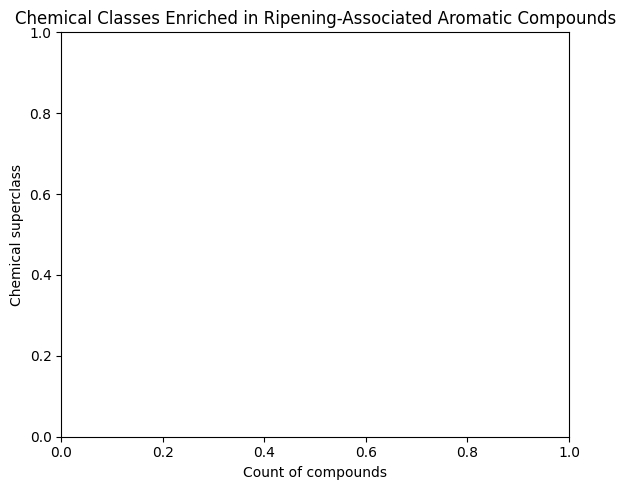

In [5]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# 1️⃣ Load your Random Forest top features
df = pd.read_csv("..\\results\\banana_analysis\\data\\feature_importance.csv")  # columns: Feature, Importance
#top_compounds = df.sort_values("Importance", ascending=False)["Feature"].head(50).tolist()

top_compounds = [name.replace(" Area", "").strip() for name in df.sort_values("Importance", ascending=False)["Feature"].head(50)]

# 2️⃣ Query PubChem or ClassyFire to map compounds to superclasses/subclasses
def get_compound_class(name):
    try:
        url = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/name/{name}/classification/JSON"
        r = requests.get(url, timeout=10)
        js = r.json()
        info = js['HierarchicalClassification']['Classification']
        # Grab first level (Superclass)
        return info[0]['Node']['Name']
    except Exception:
        return "Unknown"

compound_classes = {name: get_compound_class(name) for name in top_compounds}

# 3️⃣ Count frequency of each superclass
class_counts = Counter(compound_classes.values())
df_class = pd.DataFrame(class_counts.items(), columns=["Superclass", "Count"])
df_class = df_class[df_class.Superclass != "Unknown"].sort_values("Count", ascending=False)

# 4️⃣ Plot for your poster
plt.figure(figsize=(6,5))
sns.barplot(data=df_class.head(10), y="Superclass", x="Count", color="goldenrod")
plt.xlabel("Count of compounds")
plt.ylabel("Chemical superclass")
plt.title("Chemical Classes Enriched in Ripening-Associated Aromatic Compounds")
plt.tight_layout()
plt.show()

# 5️⃣ Save the mapping
pd.DataFrame.from_dict(compound_classes, orient="index", columns=["Superclass"]).to_csv("compound_class_mapping.csv")


In [6]:
import requests

name = "Ethyl 3-methylbutanoate"
url = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/name/{name}/classification/JSON"
r = requests.get(url, timeout=10)

print(r.status_code)
print(r.text)


ReadTimeout: HTTPSConnectionPool(host='pubchem.ncbi.nlm.nih.gov', port=443): Read timed out. (read timeout=10)

In [13]:
from preprocessing import load_and_impute

df = load_and_impute("../data/badata.csv", group_col='Groups', impute=True, fill_value=0)

c:\Users\uqkmuroi\gitcode\ML_omics\venv\lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\uqkmuroi\gitcode\ML_omics\venv\lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\uqkmuroi\gitcode\ML_omics\venv\lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\uqkmuroi\gitcode\ML_omics\venv\lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\uqkmuroi\gitcode\ML_omics\venv\lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\uqkmuroi\gitcode\ML_omics\venv\lib\site-packag

In [14]:
print(df.dtypes.value_counts())
print(df.select_dtypes(exclude=["number"]).columns)

int64      68
float64    41
object      2
Name: count, dtype: int64
Index(['Unnamed: 0', 'Groups'], dtype='object')


In [16]:
print(df['(Z)-4-Heptenal Area'])

0       397.0
1       210.0
2       303.5
3       303.5
4      1518.0
5       380.0
6       374.0
7       220.0
8     20645.0
9     34127.0
10    30464.0
11    36510.0
Name: (Z)-4-Heptenal Area, dtype: float64
